# 데이터 전처리 (Data Preprocessing)


- ML의 모든 알고리즘은 데이터 기반, 따라서 어떤 데이터를 입력으로 가지느냐에 따라 결과도 크게 달라질 수 있다.
 >Garbage In, Garbage Out
 
- Null 값은 어떻게 처리할 것인가?
-  - 단순히 평균값 대체? 해당 피처의 중요도가 높다면 피처의 평균으로 대처할 경우 왜곡 심할 수 있음. 따라서 업무 로직등을 상세히 검토해 더 정밀한 대체값을 선정


- 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않음, 따라서 문자형 값은 인코딩돼서 숫자 형으로 변환해야 함
- - 불필요한 피처라고 생각되면 삭제하는 게 더 좋음

## 데이터 인코딩

### 레이블 인코딩(Label encoding)
- 카테고리 피처를 코드형 숫자 값으로 변환
- ex)상품 데이터의 상품 구분이 TV, 냉장고, 전자레인지, 컴퓨터 등 
- TV :1 , 냉장고 :2 전자레인지 :3, 컴퓨터 :4

### 원-핫 인코딩(One Hot encoding)
- 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 컬럼에만 1을 표시하고 나머지 컬럼에는 0을 표시하는 방식

In [ ]:
#레이블 인코딩 예시
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자레인지','노트북','선풍기','선풍기','믹서기','믹서기']

#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 5 2 4 4 3 3]


In [ ]:
# 데이터가 많은 경우
print('인코딩 클래스:', encoder.classes_) # 0부터 순서대로 인코딩 값에 대한 원본을 가지고 있음

인코딩 클래스: ['TV' '냉장고' '노트북' '믹서기' '선풍기' '전자레인지']


In [ ]:
# 다시 디코딩 하는 법
print('디코딩 원본값:',encoder.inverse_transform([4,5,2,0,1,1,3,3,2,4,4,4,4,4,4]))

디코딩 원본값: ['선풍기' '전자레인지' '노트북' 'TV' '냉장고' '냉장고' '믹서기' '믹서기' '노트북' '선풍기' '선풍기' '선풍기'
 '선풍기' '선풍기' '선풍기']


### 주의할 점
- 레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환
- 하지만 레이블 인코딩이 일괄적인 숫자 값으로 변환이 되면서 몇몇 ML 알고리즘에는 이를 적용할 경우 예측 성능 떨어지는 경우 발생
- 1과 2의 차이가 정말 차이가 있는 게 맞는 건가? 
- 숫자 값에 따른 순서나 중요도로 인식이 될 수 있음, 이런 특성 때문에 레이블 인코딩은 선형회귀와 같은 ML알고리즘에는 적용하지 않아야 함
- 트리 계열의 ML알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩 별문제 없음

### 원-핫 인코딩은 레이블 인코딩의 이러한 문제점을 해결하기 위한 인코딩 방식


- 해당 고유 값에 메칭되는 피처만 1이 되고 나머지 피처는 0을 입력하며, 이러한 특성으로 원-핫(여러 개의 속성 중 단 한 개의 속성만 1로 표시)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서기','믹서기']

In [ ]:
#2차원 array로 변환
items = np.array(items).reshape(-1,1)
items.shape

(8, 1)

In [ ]:
items

array([['TV'],
       ['냉장고'],
       ['전자레인지'],
       ['컴퓨터'],
       ['선풍기'],
       ['선풍기'],
       ['믹서기'],
       ['믹서기']], dtype='<U5')

In [ ]:
#원-핫 인코딩을 적용 
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

In [ ]:
print(oh_labels)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0


In [ ]:
oh_labels.toarray() # 희소행렬이므로 toarray 메서드로 array 형태로 변환환

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

- 컬럼이 items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서기','믹서기'] 로 매칭
- 변환된 데이터의 첫 번째 레코드의 첫 번째 레코드의 첫 번째 컬럼이 1이고 나머지는 모두 0

In [ ]:
import pandas as pd

In [ ]:
df_1 = pd.DataFrame({'이름':['홍길동','김영희','김철수','박철수','오철수','정철수','정철수','배철수']})

In [ ]:
df_1

,이름
0,홍길동
1,김영희
2,김철수
3,박철수
4,오철수
5,정철수
6,정철수
7,배철수


In [ ]:
pd.get_dummies(df_1) # one-hot 인코딩 바로 사용 가능

,이름_김영희,이름_김철수,이름_박철수,이름_배철수,이름_오철수,이름_정철수,이름_홍길동
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0
5,0,0,0,0,0,1,0
6,0,0,0,0,0,1,0
7,0,0,0,1,0,0,0


In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic') # titanic 데이터 불러오기기

In [ ]:
df_sns = df[['sex', 'embarked', 'class']] # 범주형 변수인 titanic 데이터에서 sex, embarked, class 행만 추출

In [ ]:
df_1 =  pd.get_dummies(df_sns) # 추출한 행에 one-hot 인코딩 적용

In [ ]:
df_1

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,0,0,1,1,0,0
4,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,1,0
887,1,0,0,0,1,1,0,0
888,1,0,0,0,1,0,0,1
889,0,1,1,0,0,1,0,0


In [ ]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
tt_ot = pd.get_dummies(df['embarked'])
tt_ot

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
pd.concat([df,df_1], axis=1) # 깔끔한 하나의 숫자로 완성된 데이터프레임을 만들 수 있다!

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,alive,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,no,False,0,1,0,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,yes,False,1,0,1,0,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,yes,True,1,0,0,0,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,yes,False,1,0,0,0,1,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,no,True,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,...,no,True,0,1,0,0,1,0,1,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,...,yes,True,1,0,0,0,1,1,0,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,...,no,False,1,0,0,0,1,0,0,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,...,yes,True,0,1,1,0,0,1,0,0


In [ ]:
pd.get_dummies(df)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,0,1,...,0,0,0,0,0,0,0,1,1,0
1,1,1,38.0,1,0,71.2833,False,False,1,0,...,1,0,0,0,0,1,0,0,0,1
2,1,3,26.0,0,0,7.9250,False,True,1,0,...,0,0,0,0,0,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,False,False,1,0,...,1,0,0,0,0,0,0,1,0,1
4,0,3,35.0,0,0,8.0500,True,True,0,1,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,True,0,1,...,0,0,0,0,0,0,0,1,1,0
887,1,1,19.0,0,0,30.0000,False,True,1,0,...,0,0,0,0,0,0,0,1,0,1
888,0,3,NaN,1,2,23.4500,False,False,1,0,...,0,0,0,0,0,0,0,1,1,0
889,1,1,26.0,0,0,30.0000,True,True,0,1,...,1,0,0,0,0,1,0,0,0,1


In [ ]:
# 판다스에서 지원하는 API 
# get_dummies

import pandas as pd
df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서기','믹서기']})

pd.get_dummies(df) # one-hot 인코딩

,item_TV,item_냉장고,item_믹서기,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 피처 스케일링과 정규화
### 피처 스케일링(feature scaling) 
#### 표준화(Standardization), 정규화(Normalization)

- 표준화는 데이터의 피처 각각이 평균이 0 이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환
- 새로운 x의 값은 x의 평균을 뺀 값을 피처 x의 표준편차로 나눈 값으로 계산

- 일반적으로 정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념
- A는 거리를 나타내는 변수 값 0~ 100, B 는 금액 나타나는 속성 0~ 1,000,000,000,000이면 두 변수를 동일한 크기 단위로 비교하기 위해 0~1사이로 변환



<div class="alert alert-block" style="border: 2px solid #E65100;background-color:#FFF3E0;padding:10px">
    
#사이킷런 전처리에서 제공하는 Normalizer 모듈과 일반적인 정규화는 약간의 차이가 있음
- 사이킷런의 Normalizer 모듈은 선형대수에서의 정규화 개념 적용, 개별 벡터의 크기를 맞추기 위해 변환 의미
- 즉, 개별 벡터를 모든 피처 벡터의 크기로 나눔, 세 개의 피처 x,y,z가 있으면 새로운 데이터 x_new는 원래 값에서 세 개의 피처의 i번째 피처 값에 해당하는 크기를 합한 값으로 나눠줌 (정규 벡터화)
    

</div>

## StandardScaler
- 표준화를 쉽게 지원하기 위한 클래스
- 즉, 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환 
- 이렇게 가우시안 정규 분포를 가질 수 있도록 데이터를 변환하는 것
- 사이킷런 RBF 커널 SVM, 선형회귀, 로지스틱 회귀는 데이터가 가우시안 분포를를 가정, 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd 

# iris 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data

In [ ]:
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var()) # 각 컬럼별 평균과 분산을 구함

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


- StandardScaler 객체를 생성 후에 fit()과 trnasform() 메서드에 변환 대상 피처 데이터 세트를 입력하고 호출하면 간단하게 변환
- transform()을 호출할 때 스케일 변환된 데이터 세트가 넘파이의 ndarray이므로 이를 DataFrame으로 변환해 평균값 분산값 다시 확인!

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # StandardScaler객체 생성
scaler.fit(iris_df) # StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
iris_scaled = scaler.transform(iris_df)

In [ ]:
iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
#transform()시 스케일 변화된된 데이터 세트가 Numpy ndarray로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)

In [ ]:
iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [ ]:
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var()) # standard 스케일링된 값들의 평균과 분산을 구함, 평균은 0 분산은 1에 가까운 값값

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


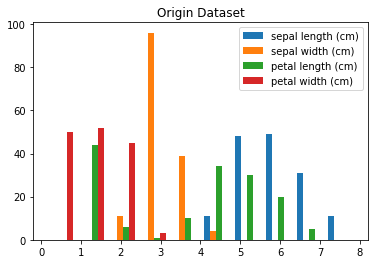

In [ ]:
import matplotlib.pyplot as plt

plt.title('Origin Dataset') # 스케일링 하기 전의 값 시각화화
plt.hist(iris_df)
plt.legend(iris_df.columns)

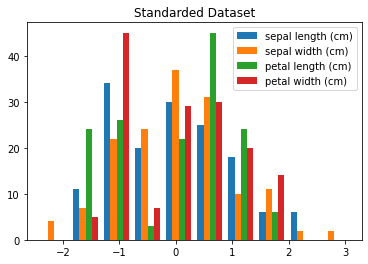

In [ ]:
iris_df_standarded = (iris_df - iris_df.mean())/iris_df.std()

plt.title('Standarded Dataset') # 스케일링 한 후의 데이터에 대한 시각화
plt.hist(iris_df_standarded)
plt.legend(iris_df_standarded.columns)

- 모든 컬럼 값의 평균이 0에 아주 까가운 값으로, 분산은 1에 아주 까가운 값으로 변환

## MinMaxScaler
- 데이터 값을 0과 1사이의 범위 값으로 변환 (음수 값이면 -1에서 1값으로 변환)
- 데이터 분포가 가우시안 분포가 아닌 경우에 Min,Max Scale을 적용
- 분류보다 회귀에 유용합니다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # MinMaxScaler객체 생성
scaler.fit(iris_df) # MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출
iris_scaled = scaler.transform(iris_df)

In [ ]:
# transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

In [ ]:
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max()) # minmax 스케일링 된 데이터의 최솟값과 최댓값, 최솟값은 0, 최댓값 1

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [ ]:
df = pd.DataFrame([[166, 18],
                  [172, 25],
                  [158, 30],
                  [182, 21],
                  [161, 26],
                  [155, 15]])
df.columns = ['height', 'age']

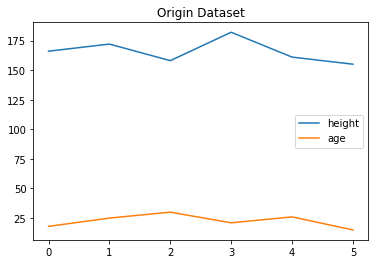

In [ ]:
# 시각화
plt.title('Origin Dataset')
plt.plot(df)
plt.legend(df.columns)

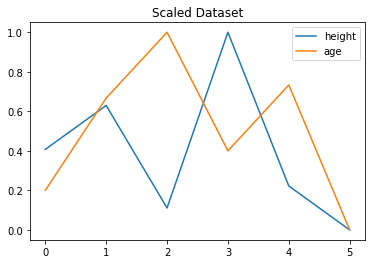

In [ ]:
df_new = (df - df.min())/(df.max() - df.min())

plt.title('Scaled Dataset')
plt.plot(df_new)
plt.legend(df_new.columns)

- 모든 피처에 0에서 1사이의 값으로 변환되는 스케일링 적용

# MaxAbsScaler()
- 각 특성의 절대값이 0 과 1 사이가 되도록 스케일링합니다.
- 즉, 모든 값은 -1 과 1 사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler 와 같습니다.
- 이상치에 매우 민감합니다.

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

maxabs_scaler = MaxAbsScaler() # 변형 객체 생성
maxabs_scaler.fit(iris_df) # 훈련데이터의 모수 분포 저장
iris_scaled = maxabs_scaler.transform(iris_df) # 훈련 데이터 스케일링

In [ ]:
# transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

In [ ]:
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)   -1.153846
sepal width (cm)    -2.000000
petal length (cm)   -0.957143
petal width (cm)    -0.800000
dtype: float64

feature들의 최댓값
sepal length (cm)    1.615385
sepal width (cm)     2.800000
petal length (cm)    0.728571
petal width (cm)     0.800000
dtype: float64


In [ ]:
# 테스트 데이터의 스케일링
#X_test_scaled = maxabs_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = maxabs_scaler.inverse_transform(X_train_scaled)

In [ ]:
df = pd.DataFrame([[1.0, 18],
                  [0.8, 25],
                  [-0.5, 30],
                  [-1.8, 21],
                  [1.2, 26],
                  [0.6, 15]])
df.columns = ['sight', 'age']

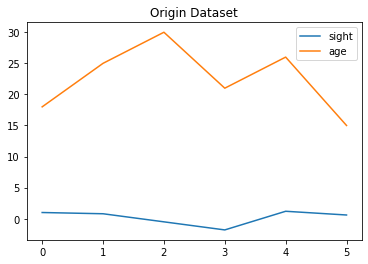

In [ ]:
# 시각화
plt.title('Origin Dataset')
plt.plot(df)
plt.legend(df.columns)

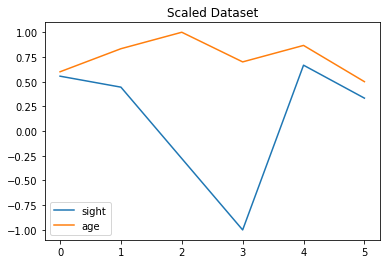

In [ ]:
df_new = df/df.abs().max()

plt.title('Scaled Dataset')
plt.plot(df_new)
plt.legend(df_new.columns)

# RobustScaler()
- 평균과 분산 대신에 중간 값과 사분위 값을 사용합니다.
- 중간 값은 정렬시 중간에 있는 값을 의미하고
- 사분위값은 1/4, 3/4에 위치한 값을 의미합니다.
- 이상치 영향을 최소화할 수 있습니다.

In [ ]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler() # 변형 객체 생성
robust_scaler.fit(iris_df) # 훈련데이터의 모수 분포 저장
iris_scaled = robust_scaler.transform(iris_df) # 훈련 데이터 스케일링

In [ ]:
#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)

In [ ]:
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)   -1.153846
sepal width (cm)    -2.000000
petal length (cm)   -0.957143
petal width (cm)    -0.800000
dtype: float64

feature들의 최댓값
sepal length (cm)    1.615385
sepal width (cm)     2.800000
petal length (cm)    0.728571
petal width (cm)     0.800000
dtype: float64


In [ ]:
# 테스트 데이터의 스케일링
#X_test_scaled = robust_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = robust_scaler.inverse_transform(X_train_scaled)

In [ ]:
df[['pclass','fare']]

,pclass,fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500
...,...,...
886,2,13.0000
887,1,30.0000
888,3,23.4500
889,1,30.0000


In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Normalizer()
- 앞의 4가지 스케일러는 각 특성(열)의 통계치를 이용하여 진행됩니다.
- 그러나 Normalizer 의 경우 각 샘플(행)마다 적용되는 방식입니다.
- 이는 한 행의 모든 특성들 사이의 유클리드 거리(L2 norm)가 1이 되도록 스케일링합니다.
- 일반적인 데이터 전처리의 상황에서 사용되는 것이 아니라
- 모델(특히나 딥러닝) 내 학습 벡터에 적용하며,
- 특히나 피쳐들이 다른 단위(키, 나이, 소득 등)라면 더더욱 사용하지 않습니다.

## 
    - 소득 나이 통장개수 잔액 
    - 1000000 50 5  2000
    - 50000000 40 3 3000
    

In [ ]:
from sklearn.preprocessing import Normalizer

normal_scaler = Normalizer() # 변형 객체 생성
normal_scaler.fit(iris_df) # 훈련데이터의 모수 분포 저장
X_train_scaled = normal_scaler.transform(iris_df) # 훈련 데이터 스케일링
X_train_scaled

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data = X_train_scaled, columns = iris.feature_names)
iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


In [ ]:
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.653877
sepal width (cm)     0.238392
petal length (cm)    0.167836
petal width (cm)     0.014727
dtype: float64

feature들의 최댓값
sepal length (cm)    0.860939
sepal width (cm)     0.607125
petal length (cm)    0.636981
petal width (cm)     0.280419
dtype: float64


In [ ]:
# 테스트 데이터의 스케일링
#X_test_scaled = normal_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = normal_scaler.inverse_transform(X_train_scaled)

## 필수과제1. 로그스케일링
- 왜도 첨도를 비교시 한쪽으로 값이 치우친 경우에 사용한다.
- 로그스케일링 대한 개념과, 로그스케일링에 대한 예시 코드 , 주석 진행

### 타이타닉 데이터를 가지고 모델링을 진행해 보자!

In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df_tt = df[['survived','pclass','sibsp','parch','embarked','sex']]

In [ ]:
df_tt

,survived,pclass,sibsp,parch,embarked,sex
0,0,3,1,0,S,male
1,1,1,1,0,C,female
2,1,3,0,0,S,female
3,1,1,1,0,S,female
4,0,3,0,0,S,male
...,...,...,...,...,...,...
886,0,2,0,0,S,male
887,1,1,0,0,S,female
888,0,3,1,2,S,female
889,1,1,0,0,C,male


In [ ]:
df_tt_one_hot = pd.get_dummies(df_tt) # 원핫인코딩!

In [ ]:
df_tt_one_hot

,survived,pclass,sibsp,parch,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,0,3,1,0,0,0,1,0,1
1,1,1,1,0,1,0,0,1,0
2,1,3,0,0,0,0,1,1,0
3,1,1,1,0,0,0,1,1,0
4,0,3,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,0,1,0,1
887,1,1,0,0,0,0,1,1,0
888,0,3,1,2,0,0,1,1,0
889,1,1,0,0,1,0,0,0,1


In [ ]:
df_tt_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   survived    891 non-null    int64
 1   pclass      891 non-null    int64
 2   sibsp       891 non-null    int64
 3   parch       891 non-null    int64
 4   embarked_C  891 non-null    uint8
 5   embarked_Q  891 non-null    uint8
 6   embarked_S  891 non-null    uint8
 7   sex_female  891 non-null    uint8
 8   sex_male    891 non-null    uint8
dtypes: int64(4), uint8(5)
memory usage: 32.3 KB


### 타이타닉 데이터는 생존을 예측하는 것
- 생존이 1, 사망 0 
- 1, 0의 이진분류
- 분류라는 모델링을 사용해야 한다.
- 분류 모델링을 불러와서 실제 전처리한 데이터를 넣고 모델링을 진행

- 데이터를 train, test 나눠서 진행해야 한다.
- 교차검증 등을 진행해야 한다.
- 과적합을 막기 위해서 진행하는데

In [ ]:
y_df = df_tt_one_hot['survived']
x_df = df_tt_one_hot.drop('survived', axis=1)

In [ ]:
y_df

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [ ]:
x_df

,pclass,sibsp,parch,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,3,1,0,0,0,1,0,1
1,1,1,0,1,0,0,1,0
2,3,0,0,0,0,1,1,0
3,1,1,0,0,0,1,1,0
4,3,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
886,2,0,0,0,0,1,0,1
887,1,0,0,0,0,1,1,0
888,3,1,2,0,0,1,1,0
889,1,0,0,1,0,0,0,1


## train, test 분리 진행

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(x_df, y_df, 
                                                    test_size=0.3, random_state=111) #test size는 train, test비중 7:3
# randm_state 넘파이에서 난수 지정할 때 seed, 트레인, 테스트 나눌 때 동일한 값이 계속 나올수 있게 지정하는 것

In [ ]:
train_input

,pclass,sibsp,parch,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
195,1,0,0,1,0,0,1,0
150,2,0,0,0,0,1,0,1
572,1,0,0,0,0,1,0,1
134,2,0,0,0,0,1,0,1
96,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
275,1,1,0,0,0,1,1,0
86,3,1,3,0,0,1,0,1
724,1,1,0,0,0,1,0,1
876,3,0,0,0,0,1,0,1


In [ ]:
test_input

,pclass,sibsp,parch,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
374,3,3,1,0,0,1,1,0
211,2,0,0,0,0,1,1,0
258,1,0,0,1,0,0,1,0
584,3,0,0,1,0,0,0,1
461,3,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
383,1,1,0,0,0,1,1,0
719,3,0,0,0,0,1,0,1
291,1,1,0,1,0,0,1,0
432,2,1,0,0,0,1,1,0


In [ ]:
train_target

195    1
150    0
572    1
134    0
96     0
      ..
275    1
86     0
724    1
876    0
852    0
Name: survived, Length: 623, dtype: int64

In [ ]:
test_target

374    0
211    1
258    1
584    0
461    0
      ..
383    1
719    0
291    1
432    1
228    0
Name: survived, Length: 268, dtype: int64

### ML 알고리즘 - 타이타닉 생존자 예측하기
- 대표적인 분류 모델
- 의사결정나무 dt
- 랜덤포레스트 rf
- 로지스틱회귀 lr

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=111) # 결정 트리 모델 객체 생성
dt_clf.fit(X_train, y_train) # 학습
dt_pred = dt_clf.predict(X_test) # 예측 
print('DT 정확도:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))  # 정확도

DT 정확도:0.7948


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=111) # 랜덤 포레스트 모델 객체 생성
rf_clf.fit(X_train, y_train) # 학습
rf_pred = rf_clf.predict(X_test) # 예측
print('RF 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred))) # 정확도도

RF 정확도:0.7910


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression() # 로지스틱 회귀 개체
lr_clf.fit(X_train, y_train) # 학습
lr_pred = lr_clf.predict(X_test) # 예측
print('lr 정확도:{0:.4f}'.format(accuracy_score(y_test, lr_pred))) # 정확도

lr 정확도:0.7910


- 타이타닉 데이터는 800개 밖에 없는 작은 데이터라 이 결과는 사실 의미는 없다.

## 필수과제1 
- 데이터를 따로 드릴 예정 
- 해당 데이터를 본인의 로직으로 전처리를 진행해 주세요.
- 머신에 바로 학습할 수 있는 데이터 전처리 형태로 만들어서 CSV파일로 저에게 전달해 주셔야 합니다.
- 수업시간에 여러분들이 만든 전처리 데이터를 모델링 돌려보면서 차이를 비교할 예정 
- 데이터는 정리해서 공지방에 공유
- 전처리하면서 꼭 로직을 정확하게 정리 잘 해주시고 해당 로직에 대한 주석처리도 코드와 함께 정리해서 제출해 주세요!

- 총 제출해야하는 내용은 1. csv파일 2. 데이터 전처리 코드와 주석
- 이 내용을 필수적으로 하시지 않으면 우수학회원은 될 수 없다.
- 너무 성의없는 전처리는 제외하겠습니다.